In [387]:
############################################################################################################################
######################### CREDIT CARD FRAUD DATA SET  ######################################################################
############################################################################################################################


In [388]:
#################################################################
############ Part I - Importing
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [389]:
df = pd.read_csv('creditcard.csv')

In [390]:
df.head()                                        #### this is the best data type one can ask for, modelling shouldn't be hard on this one

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [392]:
#####################################################################
########################### Part II - Duplicates
#####################################################################


In [393]:
df[df.duplicated()]                           #### lets take care of duplicates now

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [394]:
df = df.drop_duplicates()

In [395]:
df[df.duplicated()]                          #### no duplicates left

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [396]:
####################################################################
############## Part III - Missing Values
####################################################################


In [397]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])


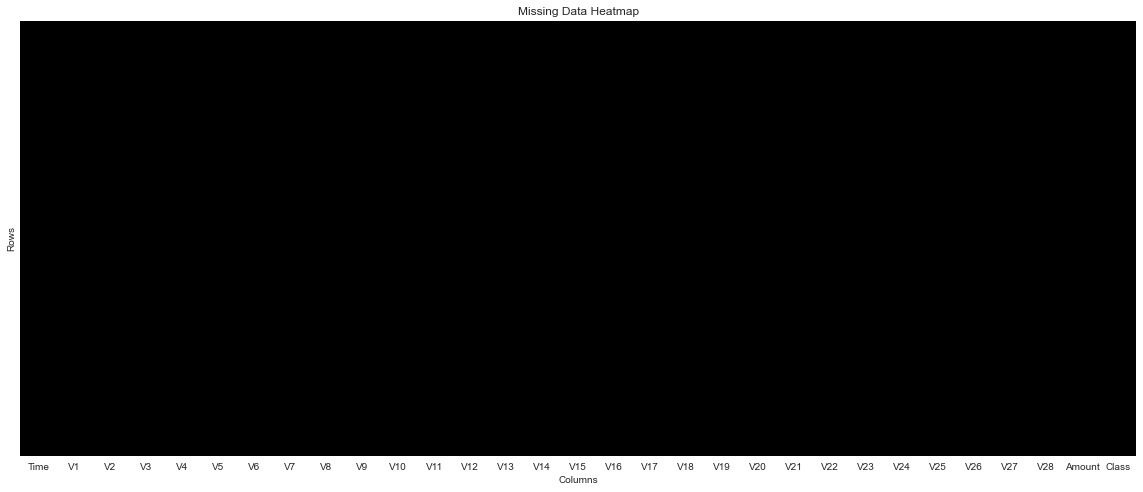

In [398]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [399]:
df.isnull().any()                   #### no null values found

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [400]:
######################################################################
############## Part IV - EDA
######################################################################


In [401]:
df.head()              #### we have 31 cols

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [402]:
df.Time.value_counts()

3767.0      21
3770.0      20
19912.0     19
3750.0      19
73885.0     17
            ..
127732.0     1
62217.0      1
127739.0     1
127741.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

In [403]:
df.Class.value_counts()                      #### although its imbalanced but we wouldn't have much trouble as the data set to train is massive

0    283253
1       473
Name: Class, dtype: int64

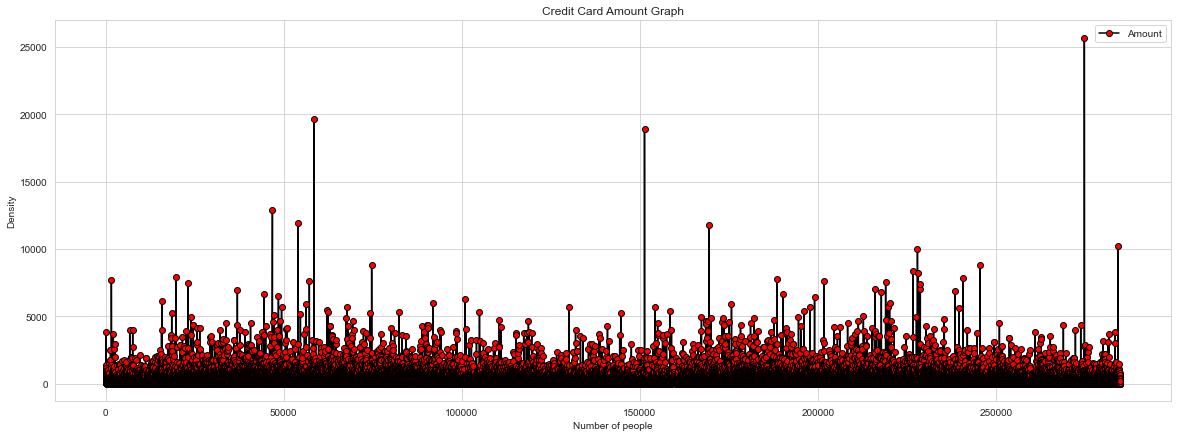

In [404]:
df['Amount'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Credit Card Amount Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')


#### y axis is in dollars and it seems theres few outliers here, lets see if those outliers are fraud transactions


In [405]:
df[df.Amount == df.Amount.max()]['Class']         #### interestingly, its not a fraud transaction as we had assumed before

274771    0
Name: Class, dtype: int64

In [406]:
df[df.Amount > 15000]['Class']                    #### this is more suprising, all the outliers are not fraud transactions

58465     0
151296    0
274771    0
Name: Class, dtype: int64

In [407]:
corr = df.corr()

corr.loc['Class']

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
Class     1.000000
Name: Class, dtype: float64

In [408]:
corr.loc['Time']

Time      1.000000
V1        0.117927
V2       -0.010556
V3       -0.422054
V4       -0.105845
V5        0.173223
V6       -0.063279
V7        0.085335
V8       -0.038203
V9       -0.007861
V10       0.031068
V11      -0.248536
V12       0.125500
V13      -0.065958
V14      -0.100316
V15      -0.184392
V16       0.011286
V17      -0.073819
V18       0.090305
V19       0.029537
V20      -0.051022
V21       0.045913
V22       0.143727
V23       0.051474
V24      -0.015954
V25      -0.233262
V26      -0.041818
V27      -0.005171
V28      -0.009305
Amount   -0.010559
Class    -0.012359
Name: Time, dtype: float64

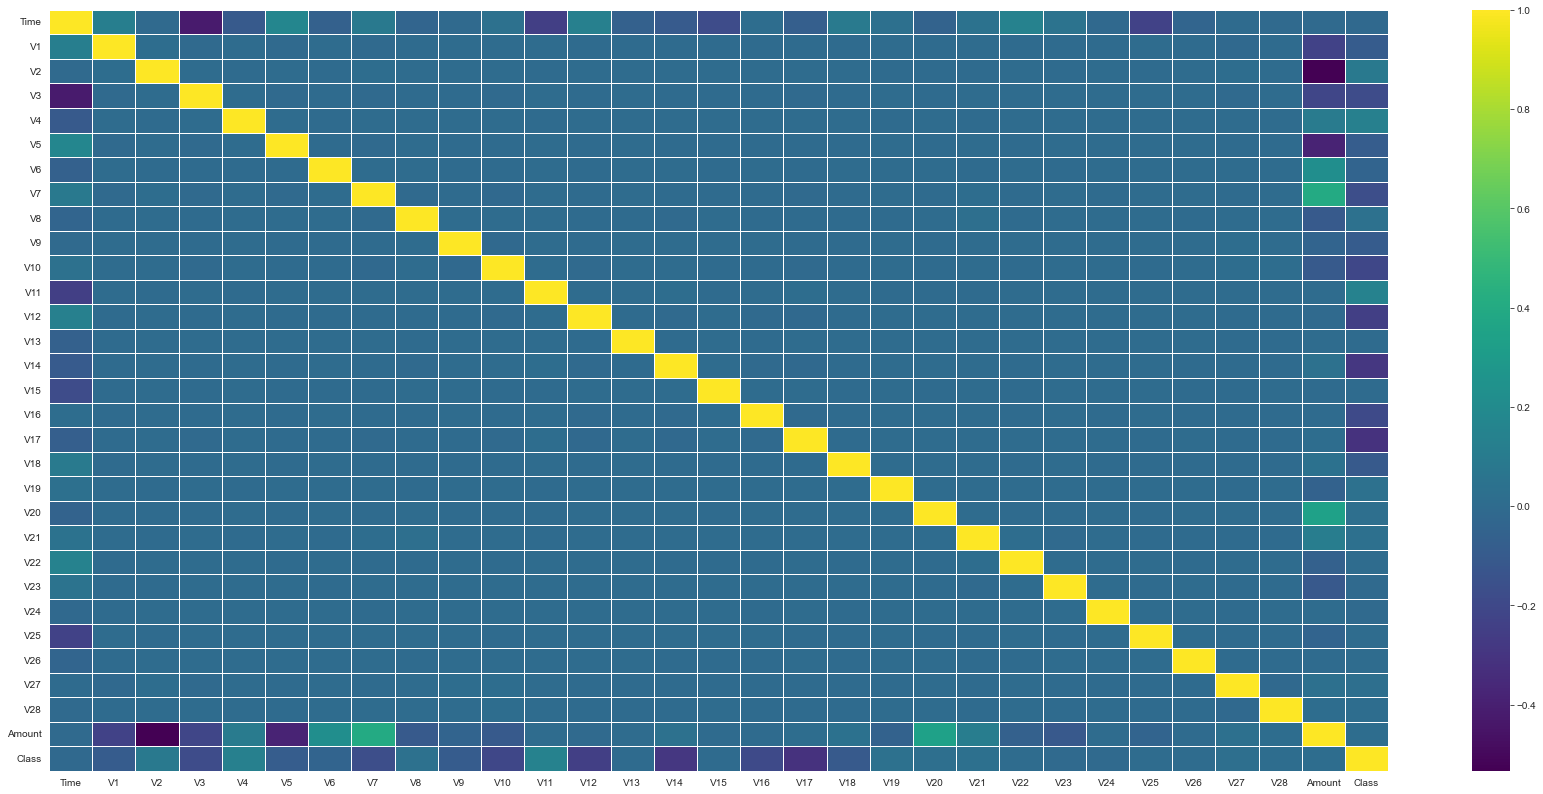

In [409]:
fig, ax = plt.subplots(figsize=(30,14))

sns.heatmap(corr,ax=ax,linewidths=0.5,cmap='viridis')

#### V2:0.08, V4:0.12, V8, V11:0.14 are the ones to look out for

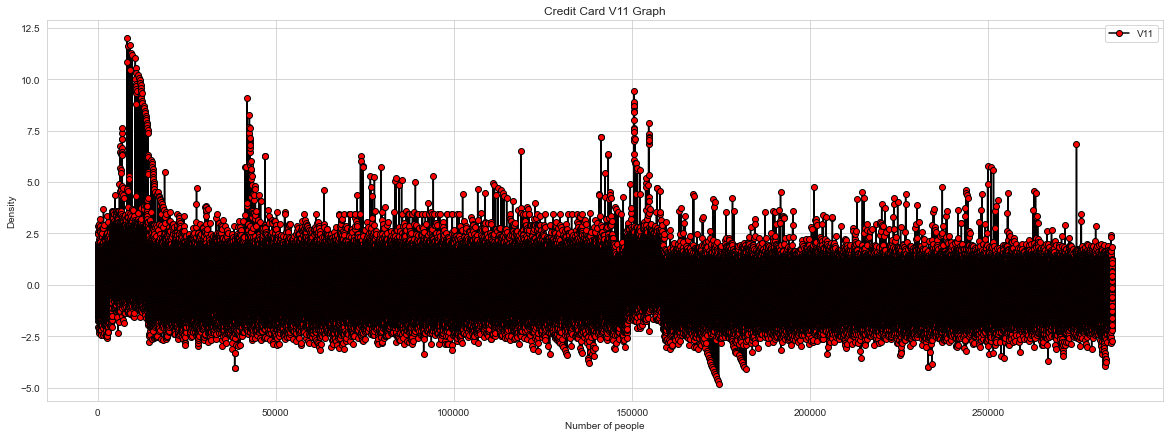

In [410]:
df['V11'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Credit Card V11 Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')

#### interesting


In [411]:
df.V11.mean()

0.00020175763995853316

In [412]:
df.V11.std()

1.018720152675308

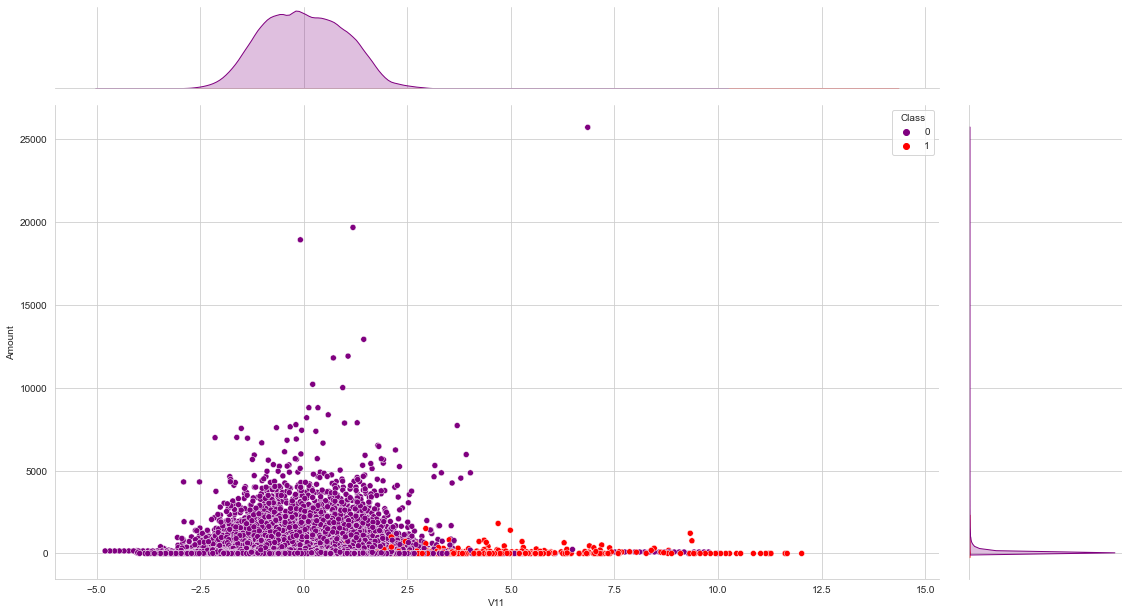

In [413]:
custom = {0:'purple',
         1:'red'}

g = sns.jointplot(x=df.V11,y=df.Amount,data=df,hue='Class',palette=custom)

g.fig.set_size_inches(17,9)

#### clearly we see that the amount doesn't really matter much as most of the fraud happens 2.5 V11

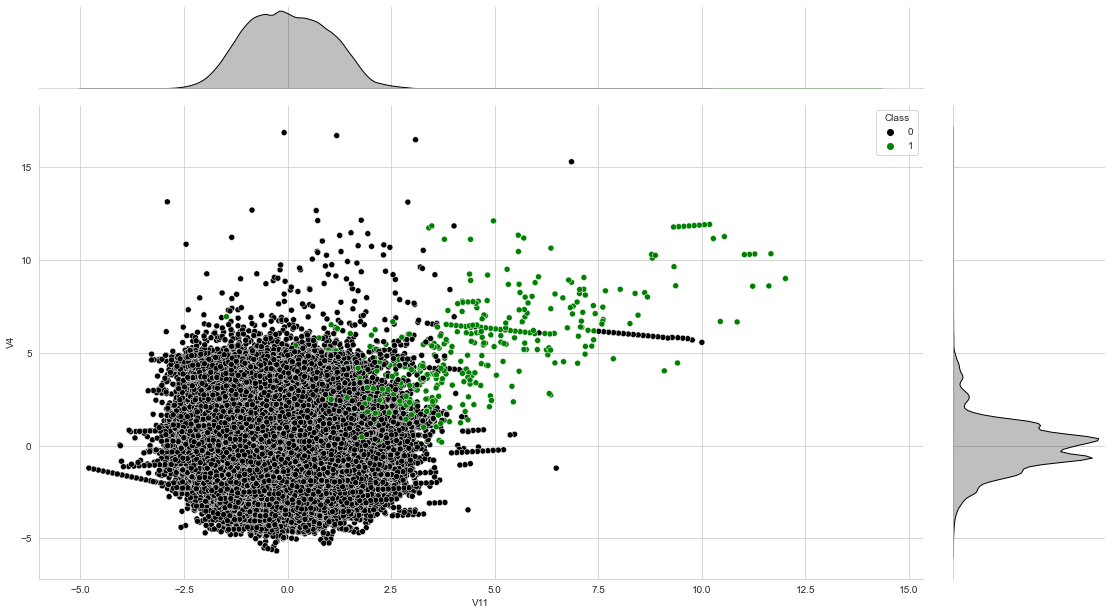

In [414]:
custom = {0:'black',
         1:'green'}

g = sns.jointplot(x=df.V11,y=df.V4,data=df,hue='Class',palette=custom)

g.fig.set_size_inches(17,9)

#### seems like it happens when V11 and V4 are at a particular point, quite intrigued

In [415]:
from scipy.stats import pearsonr          #### lets see what pearsonr has to say about the relationship


In [416]:
co_eff,p_value = pearsonr(df.V11,df.Amount)

In [417]:
co_eff                           #### not looking good

-1.474530945831578e-05

In [418]:
p_value                          #### obviously not correlated

0.9937333260471304

In [419]:
co_eff,p_value = pearsonr(df.V11,df.Class)

In [420]:
co_eff                      #### looking slightly better but obviously not strongly correlated

0.14906710367023626

In [421]:
p_value                     #### correlated

0.0

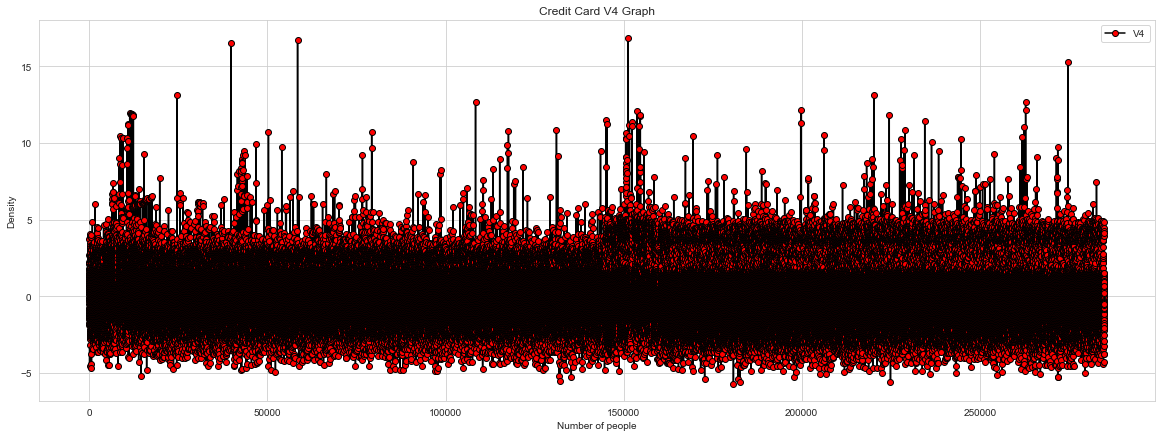

In [422]:
df['V4'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Credit Card V4 Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')

#### V4 and V11 are the ones to look out for

In [423]:
df.V4.mean()

-0.0029663077203481098

In [424]:
df.V4.std()

1.4141840144475202

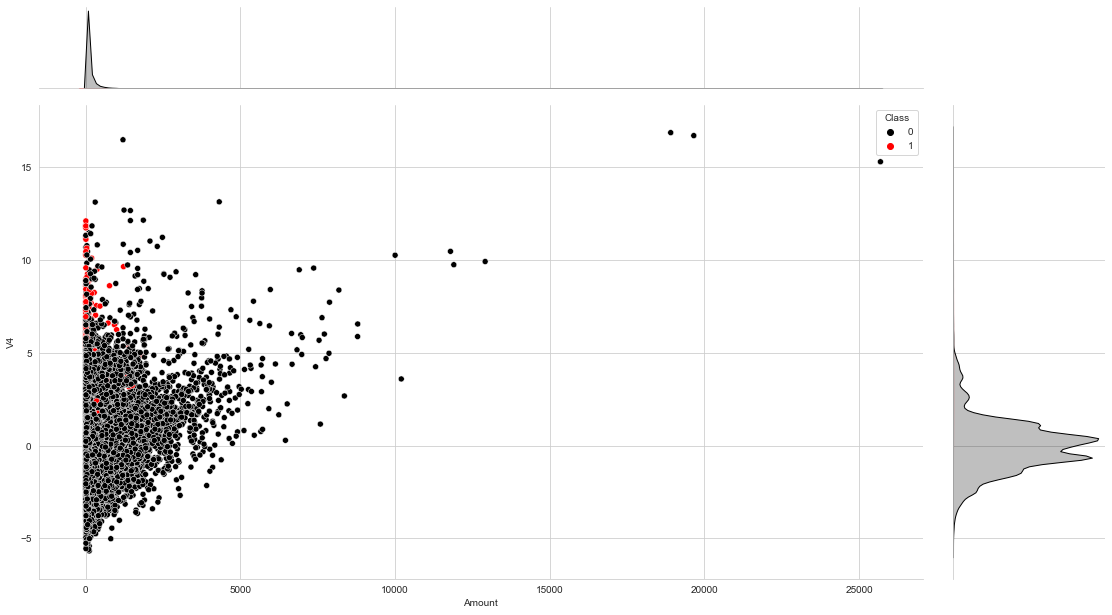

In [425]:
custom = {0:'black',
         1:'red'}

g = sns.jointplot(x=df.Amount,y=df.V4,data=df,hue='Class',palette=custom)

g.fig.set_size_inches(17,9)

#### seems like V4 higher then 5 is where the fraud lies

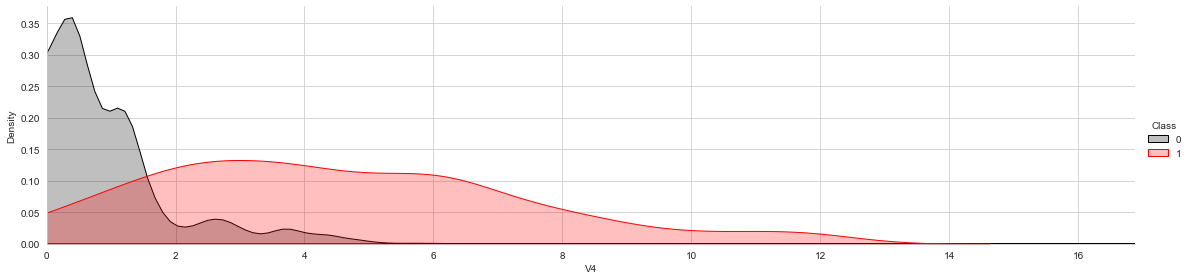

In [426]:
pl = sns.FacetGrid(df,hue='Class',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'V4',fill=True)

pl.set(xlim=(0,df.V4.max()))

pl.add_legend()

#### we can clearly see the curve where fraud starts, its extremely quite revealing

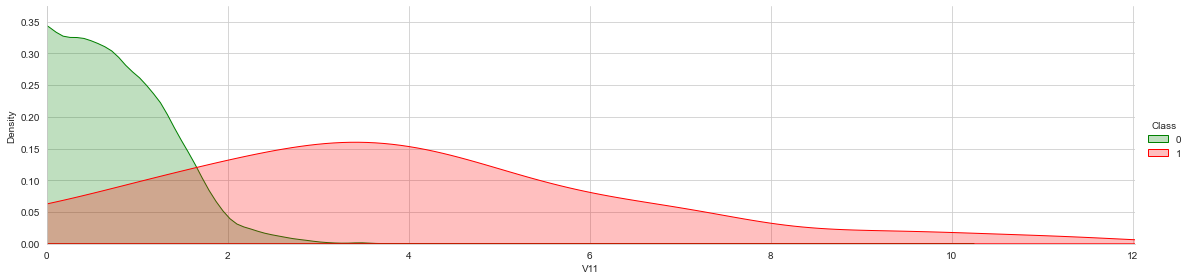

In [427]:
custom = {0:'green',
          1:'red'}

pl = sns.FacetGrid(df,hue='Class',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'V11',fill=True)

pl.set(xlim=(0,df.V11.max()))

pl.add_legend()


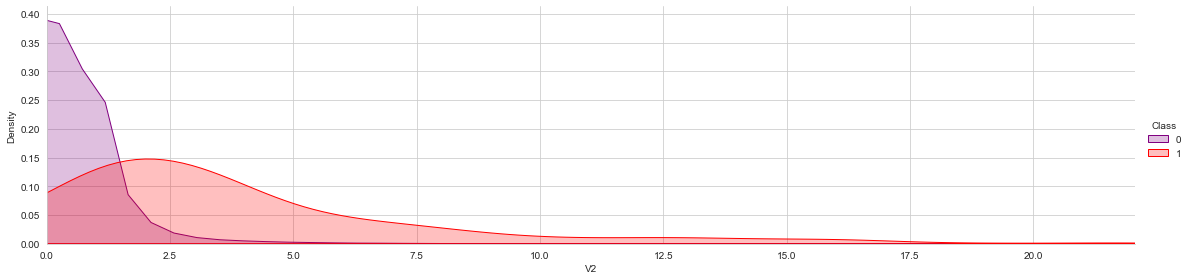

In [428]:
custom = {0:'purple',
          1:'red'}

pl = sns.FacetGrid(df,hue='Class',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'V2',fill=True)

pl.set(xlim=(0,df.V2.max()))

pl.add_legend()

#### from this it seems the model will have a easy time predicting, good for us

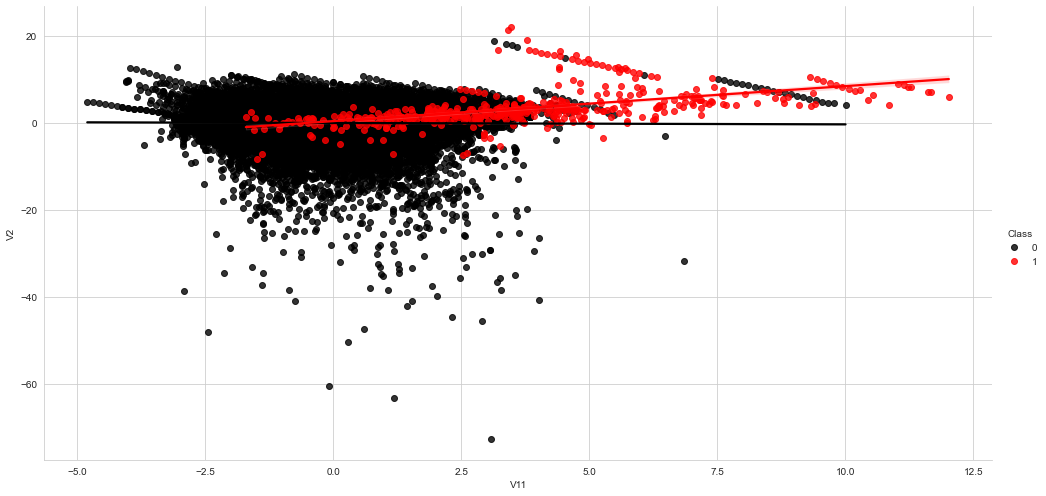

In [429]:
custom = {0:'black',
          1:'red'}

sns.lmplot(x='V11',y='V2',data=df,height=7,aspect=2,hue='Class',palette=custom)

#### with fraud transaction we can clearly see some linear relationship 

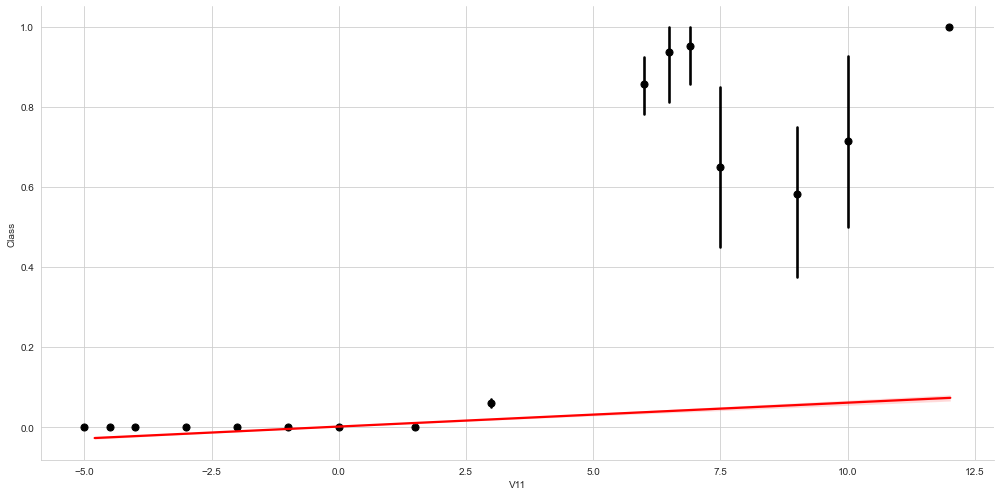

In [430]:
sns.lmplot(x='V11',y='Class',data=df,height=7,aspect=2,line_kws={'color':'red'},scatter_kws={'color':'black'},x_bins=[-5,-4.5,-4,-3,-2,-1,0,1.5,3,6,6.5,6.9,7.5,9,10,12])

#### clearly we see as the V11 passes 5.0 threshold the fraud starts to appear

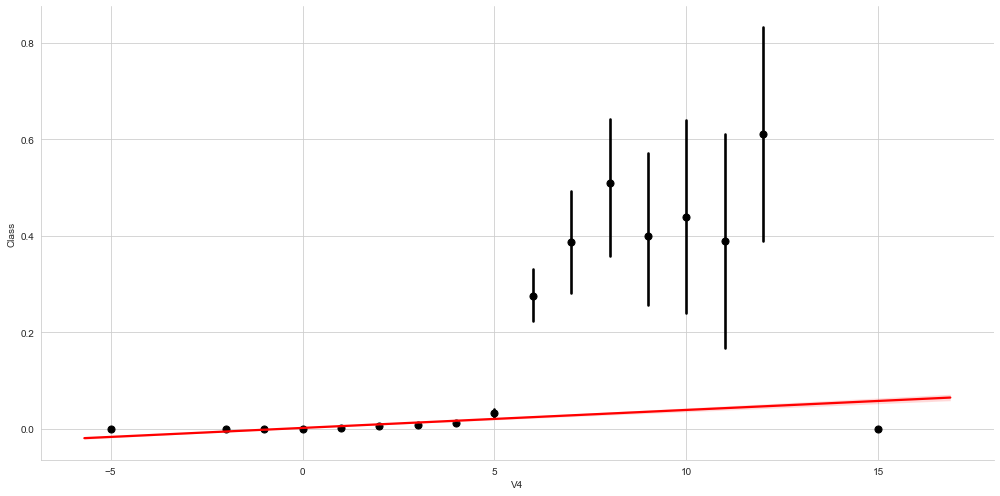

In [431]:
sns.lmplot(x='V4',y='Class',data=df,height=7,aspect=2,line_kws={'color':'red'},scatter_kws={'color':'black'},x_bins=([-5,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,15]))

plt.savefig('Credit_V4_Class_lmplot.jpeg', dpi=300, bbox_inches='tight')

#### similar case here, modelling will have a field day with such data, this is perfect data to model on

In [432]:
######################################################################
############## Part V - PCA
######################################################################


In [433]:
X = df.drop(columns='Class')

X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [434]:
y = df['Class']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [435]:
from sklearn.preprocessing import StandardScaler

#### a data set like this is most ideal for PCA

In [436]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [437]:
from sklearn.decomposition import PCA

In [438]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
final_df = pd.concat([principal_df, y], axis=1)


In [439]:
final_df.head()

,principal_component_1,principal_component_2,Class
0,0.407973,2.552992,0.0
1,-0.415387,2.069781,0.0
2,1.853391,2.461960,0.0
3,0.308422,1.743050,0.0
4,-0.005570,1.484347,0.0


In [440]:
final_df.isnull().any()

principal_component_1    True
principal_component_2    True
Class                    True
dtype: bool

In [441]:
final_df[final_df.principal_component_1.isna()]

,principal_component_1,principal_component_2,Class
283726,NaN,NaN,0.0
283727,NaN,NaN,0.0
283728,NaN,NaN,0.0
283729,NaN,NaN,0.0
283730,NaN,NaN,0.0
...,...,...,...
284802,NaN,NaN,0.0
284803,NaN,NaN,0.0
284804,NaN,NaN,0.0
284805,NaN,NaN,0.0


In [442]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284805 entries, 0 to 284806
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   principal_component_1  283726 non-null  float64
 1   principal_component_2  283726 non-null  float64
 2   Class                  283726 non-null  float64
dtypes: float64(3)
memory usage: 8.7 MB


In [443]:
final_df[final_df.principal_component_2.isna()]

,principal_component_1,principal_component_2,Class
283726,NaN,NaN,0.0
283727,NaN,NaN,0.0
283728,NaN,NaN,0.0
283729,NaN,NaN,0.0
283730,NaN,NaN,0.0
...,...,...,...
284802,NaN,NaN,0.0
284803,NaN,NaN,0.0
284804,NaN,NaN,0.0
284805,NaN,NaN,0.0


In [444]:
final_df[final_df.Class.isna()]

,principal_component_1,principal_component_2,Class
33,-0.415998,1.532749,NaN
35,-0.498950,1.871372,NaN
113,0.138086,1.908868,NaN
114,-0.441257,1.748181,NaN
115,-0.162428,1.402242,NaN
...,...,...,...
282213,-0.593744,-2.225106,NaN
282985,-0.477652,-0.559234,NaN
282987,-0.478977,-1.038233,NaN
283483,-0.493245,-1.624545,NaN


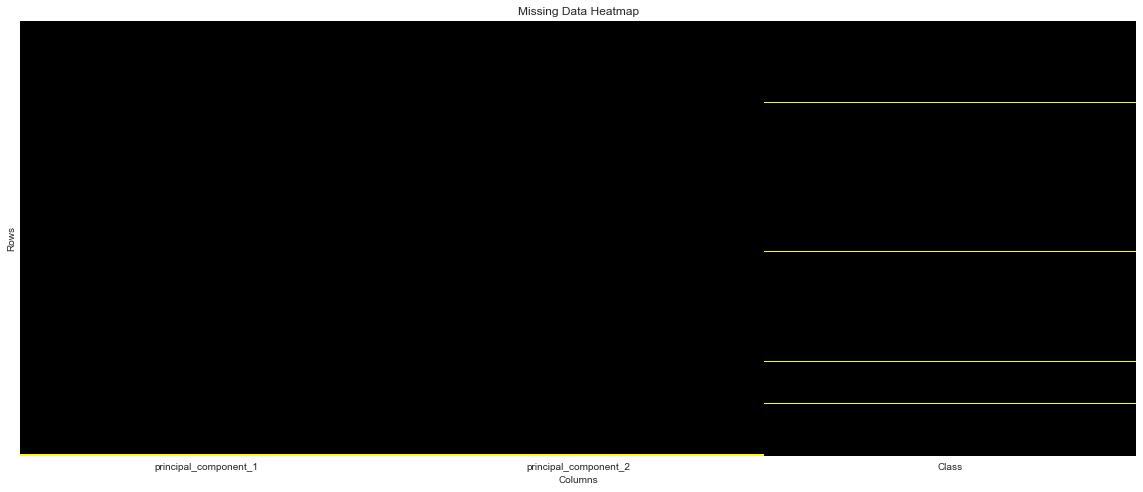

In [445]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


In [446]:
final_df = final_df.dropna()

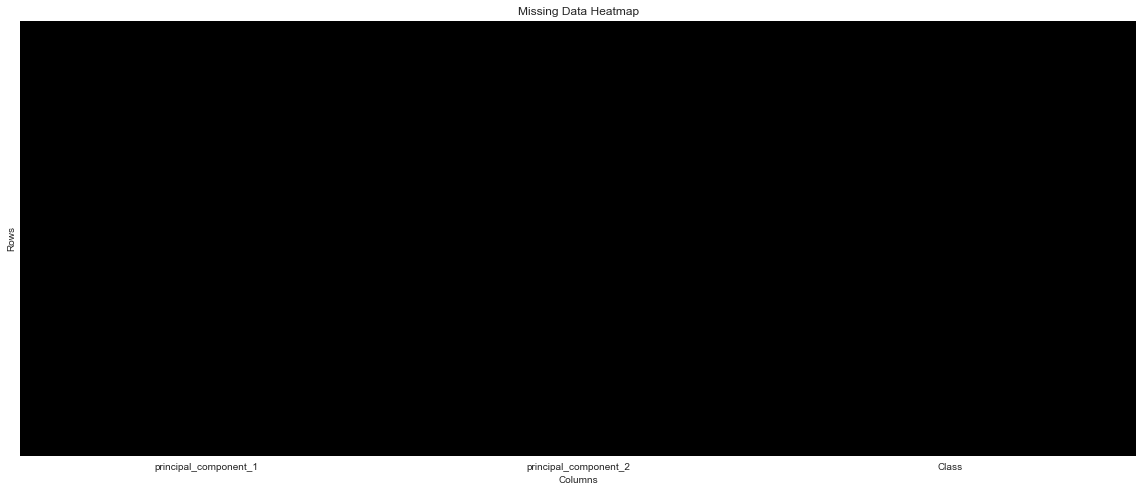

In [447]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


In [448]:
final_df.isnull().any()

principal_component_1    False
principal_component_2    False
Class                    False
dtype: bool

In [449]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282647 entries, 0 to 283725
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   principal_component_1  282647 non-null  float64
 1   principal_component_2  282647 non-null  float64
 2   Class                  282647 non-null  float64
dtypes: float64(3)
memory usage: 8.6 MB


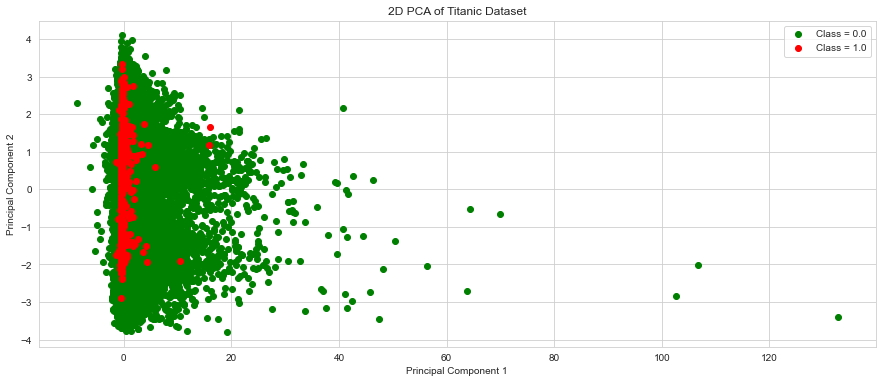

In [450]:
colors = {0: 'green', 1: 'red'}

plt.figure(figsize=(15, 6))

for i in final_df['Class'].unique():
    subset = final_df[final_df['Class'] == i]
    plt.scatter(subset['principal_component_1'], subset['principal_component_2'], 
                color=colors[i], label=f'Class = {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Titanic Dataset')
plt.legend()
plt.grid(True)

#### beauty of PCA


In [451]:
features = X.columns

features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [452]:
df_comp = pd.DataFrame(pca.components_,columns=[features])

In [453]:
df_comp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.026606,-0.174542,-0.389835,-0.145458,0.076420,-0.288907,0.160099,0.294107,-0.077755,-0.030102,...,0.252086,0.079677,-0.051522,-0.083462,0.004634,-0.026698,-0.001787,0.019968,0.007919,0.705063
1,-0.704723,-0.116321,0.025152,0.443341,0.110988,-0.169291,0.051667,-0.100009,0.044272,0.011079,...,0.034568,-0.052054,-0.142910,-0.049299,0.022765,0.242590,0.050351,0.003678,0.010082,-0.021515


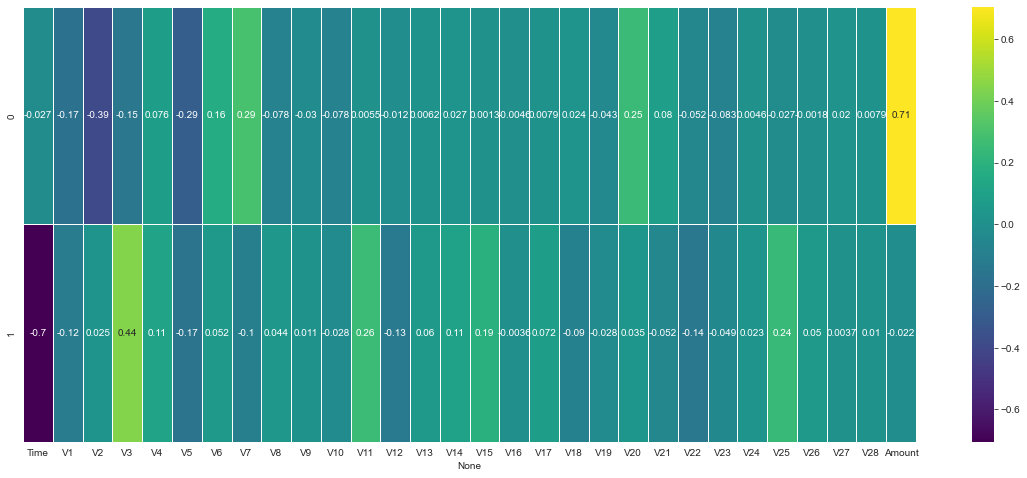

In [454]:
fig, ax = plt.subplots(figsize=(20,8))                     

sns.heatmap(df_comp,ax=ax,linewidths=0.5,annot=True,cmap='viridis')

#### PCA corr heatmap

In [ ]:
#######################################################################
######################## Part VI - Model - Classification
#######################################################################


In [189]:
from statsmodels.tools.tools import add_constant

df_with_constant = add_constant(df)

df_with_constant.head()                    #### setting up Vif


,const,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.0,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [190]:
vif = pd.DataFrame()                      #### this is extremely helpful and important to know which col can be a problem


In [191]:
vif["Feature"] = df_with_constant.columns


In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]


In [193]:
vif                 #### amount will be a problem if you follow the book but we will tackle another way

,Feature,VIF
0,const,10.104030
1,Time,1.883899
2,V1,1.673560
3,V2,4.495434
4,V3,1.951423
5,V4,1.176091
6,V5,2.879238
7,V6,1.584989
8,V7,3.010736
9,V8,1.135727


In [194]:
from sklearn.model_selection import train_test_split


In [195]:
X = df.drop(columns=['Class'])

X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [196]:
y = df['Class']

y.value_counts()                       #### just look at the imbalance but thankfully our data is massive so it shouldnt throw off our model

0    283253
1       473
Name: Class, dtype: int64

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


In [198]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [199]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]),['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount'])
    ])


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [201]:
from sklearn.linear_model import LogisticRegression


In [202]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [203]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
                          

In [204]:
y_predict = model.predict(X_test)

In [205]:
from sklearn import metrics


In [206]:
print(metrics.classification_report(y_test,y_predict))                #### quite decent model if you ask me


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.55      0.68       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



In [207]:
from sklearn.ensemble import RandomForestClassifier


In [208]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [209]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
                          

In [210]:
y_predict = model.predict(X_test)

In [211]:
print(metrics.classification_report(y_test,y_predict))                   #### this is a very good result honestly

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.94      0.72      0.82       134

    accuracy                           1.00     85118
   macro avg       0.97      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [212]:
from sklearn.linear_model import RidgeClassifier                     #### lets see what ridge can bring to the table

In [213]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount'])
    ])


In [214]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RidgeClassifier(alpha=1.0))
])


In [215]:
model.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('classifier', RidgeClassifier())])

In [216]:
y_predict = model.predict(X_test)

In [217]:
print(metrics.classification_report(y_test,y_predict))                     #### didn't help much

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.85      0.40      0.54       134

    accuracy                           1.00     85118
   macro avg       0.93      0.70      0.77     85118
weighted avg       1.00      1.00      1.00     85118



In [218]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]),['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount'])
    ])


In [223]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [224]:
import xgboost as xgb

In [225]:
clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_jobs=-1))
])

param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9]
}

In [226]:
from sklearn.model_selection import RandomizedSearchCV

In [228]:
%%time

random_search_xgb = RandomizedSearchCV(clf_xgb, param_grid_xgb, cv=3, scoring='accuracy', random_state=42,verbose=2)
random_search_xgb.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.7; total time= 1.4min
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.7; total time= 1.4min
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.7; total time= 1.3min
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.7; total time=  50.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.7; total time=  48.3s
[CV] END classifier__colsample_bytree=0.7, classifier__lear

In [230]:
best_model = random_search_xgb.best_estimator_

In [231]:
y_predict = best_model.predict(X_test)

In [232]:
print(metrics.classification_report(y_test,y_predict))                           #### best one yet

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.75      0.84       134

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [233]:
from sklearn.ensemble import StackingClassifier

In [239]:
base_models = [
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3,verbose=2)


In [240]:
%%time

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

model.fit(X_train, y_train)


Wall time: 8min 3s


In [241]:
y_predict = model.predict(X_test)

In [242]:
print(metrics.classification_report(y_test,y_predict))                           #### no improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.93      0.72      0.82       134

    accuracy                           1.00     85118
   macro avg       0.97      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
############################################################################################################################
#### We are concluding our model development phase, having achieved outstanding performance in predicting credit card ######
#### fraud. Our model demonstrates near-perfect accuracy of 1.00 and a precision close to 0.95. These results reflect ######
#### the model's exceptional ability to correctly identify fraudulent transactions while minimizing false positives. #######
############################################################################################################################
